In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [4]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [5]:
from sklearn.impute import SimpleImputer


In [6]:
imputer = SimpleImputer(missing_values = np.NAN,
                        strategy ='most_frequent')

imputer = imputer.fit(df)

In [7]:
df1 = imputer.transform(df)
df1

array([['CS-97001', 'B-', 'D+', ..., 'B', 'A-', 2.205],
       ['CS-97002', 'A', 'D', ..., 'C', 'B', 2.008],
       ['CS-97003', 'A', 'B', ..., 'A-', 'A', 3.608],
       ...,
       ['CS-97569', 'B', 'A', ..., 'A-', 'A-', 3.47],
       ['CS-97570', 'A', 'B+', ..., 'B-', 'C', 2.193],
       ['CS-97571', 'C', 'D', ..., 'D', 'C-', 1.753]], dtype=object)

In [8]:
df1=pd.DataFrame(df1)

In [10]:
df1.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
dtype: int64

In [11]:
df=df1

In [12]:
df=df.rename(columns={0:'Seat_No.', 1:'PH-121', 2:'HS-101', 3:'CY-105', 4:'HS-105/12', 5:'MT-111',
       6:'CS-105', 7:'CS-106',8: 'EL-102', 9:'EE-119', 10:'ME-107', 11:'CS-107', 12:'HS-205/20',
       13:'MT-222', 14:'EE-222', 15:'MT-224',16: 'CS-210',17: 'CS-211', 18:'CS-203', 19:'CS-214',
       20:'EE-217',21: 'CS-212', 22:'CS-215',23: 'MT-331', 24:'EF-303', 25:'HS-304', 26:'CS-301',
       27:'CS-302',28: 'TC-383', 29:'MT-442',30: 'EL-332', 31:'CS-318', 32:'CS-306', 33:'CS-312',
       34:'CS-317', 35:'CS-403', 36:'CS-421',37: 'CS-406', 38:'CS-414',39: 'CS-419',40: 'CS-423',
       41:'CS-412', 42:'CGPA'})

In [13]:
df.head()

,Seat_No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [14]:
X=df

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:

X.iloc[:,1]=le.fit_transform(X.iloc[:,1])
X.iloc[:,2]=le.fit_transform(X.iloc[:,2])
X.iloc[:,3]=le.fit_transform(X.iloc[:,3])
X.iloc[:,4]=le.fit_transform(X.iloc[:,4])
X.iloc[:,5]=le.fit_transform(X.iloc[:,5])
X.iloc[:,6]=le.fit_transform(X.iloc[:,6])
X.iloc[:,7]=le.fit_transform(X.iloc[:,7])
X.iloc[:,8]=le.fit_transform(X.iloc[:,8])
X.iloc[:,9]=le.fit_transform(X.iloc[:,9])
X.iloc[:,10]=le.fit_transform(X.iloc[:,10])
X.iloc[:,11]=le.fit_transform(X.iloc[:,11])
X.iloc[:,12]=le.fit_transform(X.iloc[:,12])
X.iloc[:,13]=le.fit_transform(X.iloc[:,13])
X.iloc[:,14]=le.fit_transform(X.iloc[:,14])
X.iloc[:,15]=le.fit_transform(X.iloc[:,15])
X.iloc[:,16]=le.fit_transform(X.iloc[:,16])
X.iloc[:,17]=le.fit_transform(X.iloc[:,17])
X.iloc[:,18]=le.fit_transform(X.iloc[:,18])
X.iloc[:,19]=le.fit_transform(X.iloc[:,19])
X.iloc[:,20]=le.fit_transform(X.iloc[:,20])
X.iloc[:,21]=le.fit_transform(X.iloc[:,21])
X.iloc[:,22]=le.fit_transform(X.iloc[:,22])
X.iloc[:,23]=le.fit_transform(X.iloc[:,23])
X.iloc[:,24]=le.fit_transform(X.iloc[:,24])
X.iloc[:,25]=le.fit_transform(X.iloc[:,25])
X.iloc[:,26]=le.fit_transform(X.iloc[:,26])
X.iloc[:,27]=le.fit_transform(X.iloc[:,27])
X.iloc[:,28]=le.fit_transform(X.iloc[:,28])
X.iloc[:,29]=le.fit_transform(X.iloc[:,29])
X.iloc[:,30]=le.fit_transform(X.iloc[:,30])
X.iloc[:,31]=le.fit_transform(X.iloc[:,31])
X.iloc[:,32]=le.fit_transform(X.iloc[:,32])
X.iloc[:,33]=le.fit_transform(X.iloc[:,33])
X.iloc[:,34]=le.fit_transform(X.iloc[:,34])
X.iloc[:,35]=le.fit_transform(X.iloc[:,35])
X.iloc[:,36]=le.fit_transform(X.iloc[:,36])
X.iloc[:,37]=le.fit_transform(X.iloc[:,37])
X.iloc[:,38]=le.fit_transform(X.iloc[:,38])
X.iloc[:,39]=le.fit_transform(X.iloc[:,39])
X.iloc[:,40]=le.fit_transform(X.iloc[:,40])
X.iloc[:,41]=le.fit_transform(X.iloc[:,41])



In [18]:
X.head()

,Seat_No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,CS-97002,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,CS-97003,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,CS-97004,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448


In [19]:
df=X

In [20]:
df.head()

,Seat_No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,CS-97002,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,CS-97003,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,CS-97004,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Seat_No.   571 non-null    object
 1   PH-121     571 non-null    int32 
 2   HS-101     571 non-null    int32 
 3   CY-105     571 non-null    int32 
 4   HS-105/12  571 non-null    int32 
 5   MT-111     571 non-null    int32 
 6   CS-105     571 non-null    int32 
 7   CS-106     571 non-null    int32 
 8   EL-102     571 non-null    int32 
 9   EE-119     571 non-null    int32 
 10  ME-107     571 non-null    int32 
 11  CS-107     571 non-null    int32 
 12  HS-205/20  571 non-null    int32 
 13  MT-222     571 non-null    int32 
 14  EE-222     571 non-null    int32 
 15  MT-224     571 non-null    int32 
 16  CS-210     571 non-null    int32 
 17  CS-211     571 non-null    int32 
 18  CS-203     571 non-null    int32 
 19  CS-214     571 non-null    int32 
 20  EE-217     571 non-null    int32

In [22]:
df['CGPA']= df['CGPA'].astype(int)

In [23]:
.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.557843,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,0.533558,...,0.038184,0.464022,0.321264,0.290351,0.280166,0.152437,0.462770,0.094921,0.293815,-0.589795
HS-101,0.382436,1.000000,0.335074,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,0.336545,...,0.213380,0.364250,0.229546,0.301934,0.265551,0.225977,0.284668,0.228103,0.226039,-0.439593
CY-105,0.557843,0.335074,1.000000,0.510123,0.538380,0.578573,0.378223,0.447539,0.467250,0.464418,...,0.261555,0.472137,0.464575,0.349827,0.129957,0.008774,0.430053,0.120885,0.064912,-0.588335
HS-105/12,0.498561,0.473132,0.510123,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,0.320137,...,0.263143,0.478816,0.451907,0.415946,0.168150,0.142806,0.465352,0.235029,0.153293,-0.552057
MT-111,0.468968,0.432742,0.538380,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,0.471685,...,0.467946,0.555098,0.410540,0.511463,0.300391,0.228637,0.502473,0.400679,0.269792,-0.638614
CS-105,0.609990,0.400713,0.578573,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,0.455470,...,0.059711,0.387639,0.279329,0.236345,0.237615,0.121965,0.306827,0.045134,0.179777,-0.552984
CS-106,0.293963,0.312019,0.378223,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,0.281233,...,0.450752,0.416562,0.426402,0.397195,0.129554,0.108916,0.421989,0.339963,0.185782,-0.457422
EL-102,0.423942,0.349412,0.447539,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,0.461690,...,0.301324,0.466556,0.304240,0.368959,0.253133,0.242234,0.379308,0.369173,0.265289,-0.567700
EE-119,0.579964,0.309697,0.467250,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,0.572964,...,0.156809,0.445496,0.341988,0.359230,0.297664,0.214165,0.465913,0.244615,0.320746,-0.569946
ME-107,0.533558,0.336545,0.464418,0.320137,0.471685,0.455470,0.281233,0.461690,0.572964,1.000000,...,0.199848,0.462568,0.336647,0.345832,0.300913,0.154184,0.440407,0.220977,0.293638,-0.586075


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Seat_No.   571 non-null    object
 1   PH-121     571 non-null    int32 
 2   HS-101     571 non-null    int32 
 3   CY-105     571 non-null    int32 
 4   HS-105/12  571 non-null    int32 
 5   MT-111     571 non-null    int32 
 6   CS-105     571 non-null    int32 
 7   CS-106     571 non-null    int32 
 8   EL-102     571 non-null    int32 
 9   EE-119     571 non-null    int32 
 10  ME-107     571 non-null    int32 
 11  CS-107     571 non-null    int32 
 12  HS-205/20  571 non-null    int32 
 13  MT-222     571 non-null    int32 
 14  EE-222     571 non-null    int32 
 15  MT-224     571 non-null    int32 
 16  CS-210     571 non-null    int32 
 17  CS-211     571 non-null    int32 
 18  CS-203     571 non-null    int32 
 19  CS-214     571 non-null    int32 
 20  EE-217     571 non-null    int32

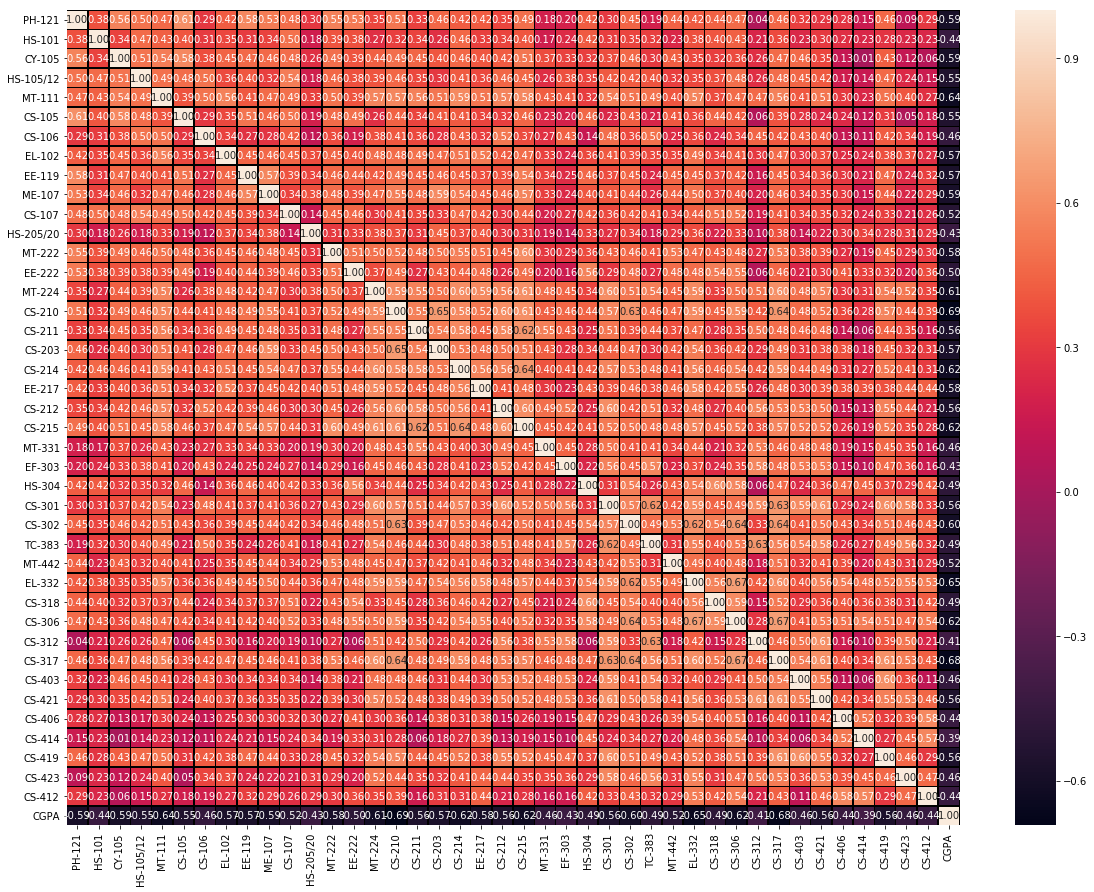

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.show()

In [26]:
df.head()

,Seat_No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2
1,CS-97002,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2
2,CS-97003,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3
3,CS-97004,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1
4,CS-97005,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3


In [27]:
X=df.drop(['Seat_No.','CGPA'],axis=1)
y=df['CGPA']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_reg=LogisticRegression()

In [31]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
def metric_score (clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n ++++++++++++++ train result is++++++++++++ ')
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
        
    elif train ==False:
        pred=clf.predict(x_test)
        print('\n ++++++++++++++ test result is++++++++++++ ')
        print(f"Accuracy Score: {accuracy_score(y_test, pred) *100:.2f}%")
        
        print ('\n \n Test classification report \n',classification_report(y_test,pred, digits=2))

In [33]:

metric_score(log_reg,x_train,x_test,y_train,y_test,train=True)
metric_score(log_reg,x_train,x_test,y_train,y_test,train=False)


 ++++++++++++++ train result is++++++++++++ 
Accuracy Score: 89.95%

 ++++++++++++++ test result is++++++++++++ 
Accuracy Score: 85.31%

 
 Test classification report 
               precision    recall  f1-score   support

           1       0.60      0.27      0.37        11
           2       0.81      0.79      0.80        53
           3       0.90      0.97      0.93        79

   micro avg       0.85      0.85      0.85       143
   macro avg       0.77      0.68      0.70       143
weighted avg       0.84      0.85      0.84       143



In [34]:
random_clf=RandomForestClassifier()


In [35]:
random_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:

metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


 ++++++++++++++ train result is++++++++++++ 
Accuracy Score: 99.53%

 ++++++++++++++ test result is++++++++++++ 
Accuracy Score: 88.11%

 
 Test classification report 
               precision    recall  f1-score   support

           1       0.71      0.45      0.56        11
           2       0.83      0.85      0.84        53
           3       0.93      0.96      0.94        79

   micro avg       0.88      0.88      0.88       143
   macro avg       0.82      0.76      0.78       143
weighted avg       0.88      0.88      0.88       143



In [46]:
params={'n_estimators':range(2,10),
       'criterion':['gini','entropy'],
       'max_depth':range(2,10),
       'min_samples_split':[2],
        'min_samples_leaf':[1]}

In [47]:
grid=GridSearchCV(random_clf,param_grid=params)

In [48]:
grid.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(2, 10), 'criterion': ['gini', 'entropy'], 'max_depth': range(2, 10), 'min_samples_split': [2], 'min_samples_leaf': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
print('best params==> ',grid.best_params_)

best params==>  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6}


In [51]:
random_clf=grid.best_estimator_

In [52]:
random_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:

metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


 ++++++++++++++ train result is++++++++++++ 
Accuracy Score: 96.03%

 ++++++++++++++ test result is++++++++++++ 
Accuracy Score: 88.81%

 
 Test classification report 
               precision    recall  f1-score   support

           1       1.00      0.36      0.53        11
           2       0.85      0.85      0.85        53
           3       0.91      0.99      0.95        79

   micro avg       0.89      0.89      0.89       143
   macro avg       0.92      0.73      0.78       143
weighted avg       0.89      0.89      0.88       143



In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt=DecisionTreeClassifier()

In [58]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:

metric_score(dt,x_train,x_test,y_train,y_test,train=True)
metric_score(dt,x_train,x_test,y_train,y_test,train=False)


 ++++++++++++++ train result is++++++++++++ 
Accuracy Score: 100.00%

 ++++++++++++++ test result is++++++++++++ 
Accuracy Score: 88.11%

 
 Test classification report 
               precision    recall  f1-score   support

           1       0.75      0.55      0.63        11
           2       0.85      0.83      0.84        53
           3       0.92      0.96      0.94        79

   micro avg       0.88      0.88      0.88       143
   macro avg       0.84      0.78      0.80       143
weighted avg       0.88      0.88      0.88       143



In [61]:
lr=LogisticRegression()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()

In [62]:
X=df.drop(['Seat_No.','CGPA'],axis=1)
y=df['CGPA']

In [63]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)

In [64]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)

print('all models are trained')

all models are trained


In [65]:
lr.score(x_test,y_test)
rf.score(x_test,y_test)
dt.score(x_test,y_test)

print('all models test score recorded')

all models test score recorded


In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

In [69]:
!pip install scikit-plot

In [70]:
from scikitplot.metrics import plot_roc_curve

In [72]:
disp=plot_roc_curve(dt,x_train,y_train)

plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)

plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

TypeError: len() of unsized object